### Task 1: Exploratory Data Analysis (EDA):
1.	Load the dataset and perform basic data exploration.
2.	Examine the distribution of features using histograms, box plots, or density plots.
3.	Investigate correlations between features to understand relationships within the data.
### Task 2: Dimensionality Reduction with PCA:
1.	Standardize the features to ensure they have a mean of 0 and a standard deviation of Implement PCA to reduce the dimensionality of the dataset.
2.	Determine the optimal number of principal components using techniques like scree plot or cumulative explained variance.
3.	Transform the original dataset into the principal components.
### Task 3: Clustering with Original Data:
1.	Apply a clustering algorithm (e.g., K-means) to the original dataset.
2.	Visualize the clustering results using appropriate plots.
3.	Evaluate the clustering performance using metrics such as silhouette score or Davies–Bouldin index.
### Task 4: Clustering with PCA Data:
1.	Apply the same clustering algorithm to the PCA-transformed dataset.
2.	Visualize the clustering results obtained from PCA-transformed data.
3.	Compare the clustering results from PCA-transformed data with those from the original dataset.
### Task 5: Comparison and Analysis:
1.	Compare the clustering results obtained from the original dataset and PCA-transformed data.
2.	Discuss any similarities or differences observed in the clustering results.
3.	Reflect on the impact of dimensionality reduction on clustering performance.
4.	Analyze the trade-offs between using PCA and clustering directly on the original dataset.
### Task 6: Conclusion and Insights

1.	Summarize the key findings and insights from the assignment.
2.	Discuss the practical implications of using PCA and clustering in data analysis.
3.	Provide recommendations for when to use each technique based on the analysis conducted.


In [18]:
import pandas as pd
df = pd.read_csv('wine.csv')
df

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,3,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740
174,3,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750
175,3,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835
176,3,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840


In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Type             178 non-null    int64  
 1   Alcohol          178 non-null    float64
 2   Malic            178 non-null    float64
 3   Ash              178 non-null    float64
 4   Alcalinity       178 non-null    float64
 5   Magnesium        178 non-null    int64  
 6   Phenols          178 non-null    float64
 7   Flavanoids       178 non-null    float64
 8   Nonflavanoids    178 non-null    float64
 9   Proanthocyanins  178 non-null    float64
 10  Color            178 non-null    float64
 11  Hue              178 non-null    float64
 12  Dilution         178 non-null    float64
 13  Proline          178 non-null    int64  
dtypes: float64(11), int64(3)
memory usage: 19.6 KB


In [20]:
df.isnull().sum()

Type               0
Alcohol            0
Malic              0
Ash                0
Alcalinity         0
Magnesium          0
Phenols            0
Flavanoids         0
Nonflavanoids      0
Proanthocyanins    0
Color              0
Hue                0
Dilution           0
Proline            0
dtype: int64

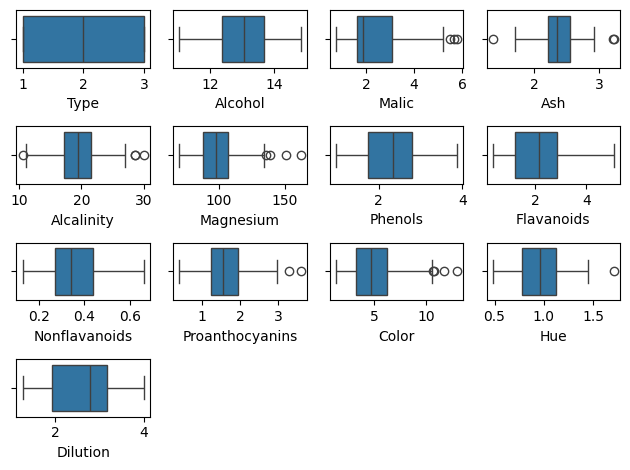

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns
col = df.columns
for i in range(len(col)-1):
    plt.subplot(4, 4, i+1)
    sns.boxplot(x=df[col[i]])
    plt.tight_layout()

plt.show()

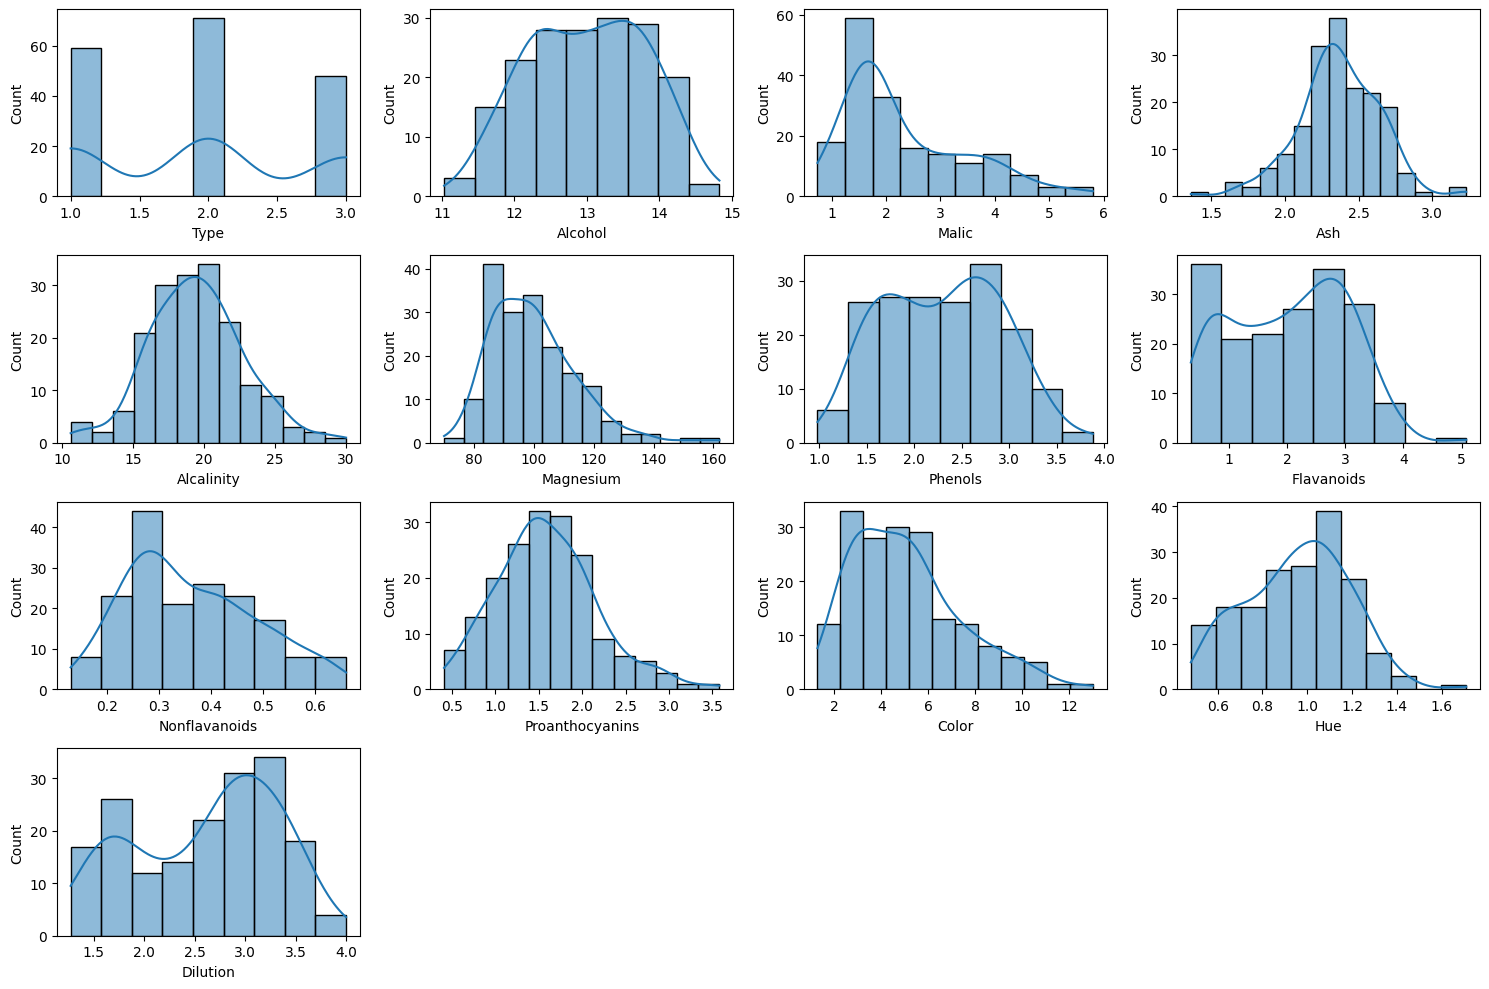

In [22]:
plt.figure(figsize=(15,10))
for i in range(len(col)-1):
    plt.subplot(4, 4, i+1)
    sns.histplot(x=df[col[i]], kde=True)
    plt.tight_layout()

plt.show()

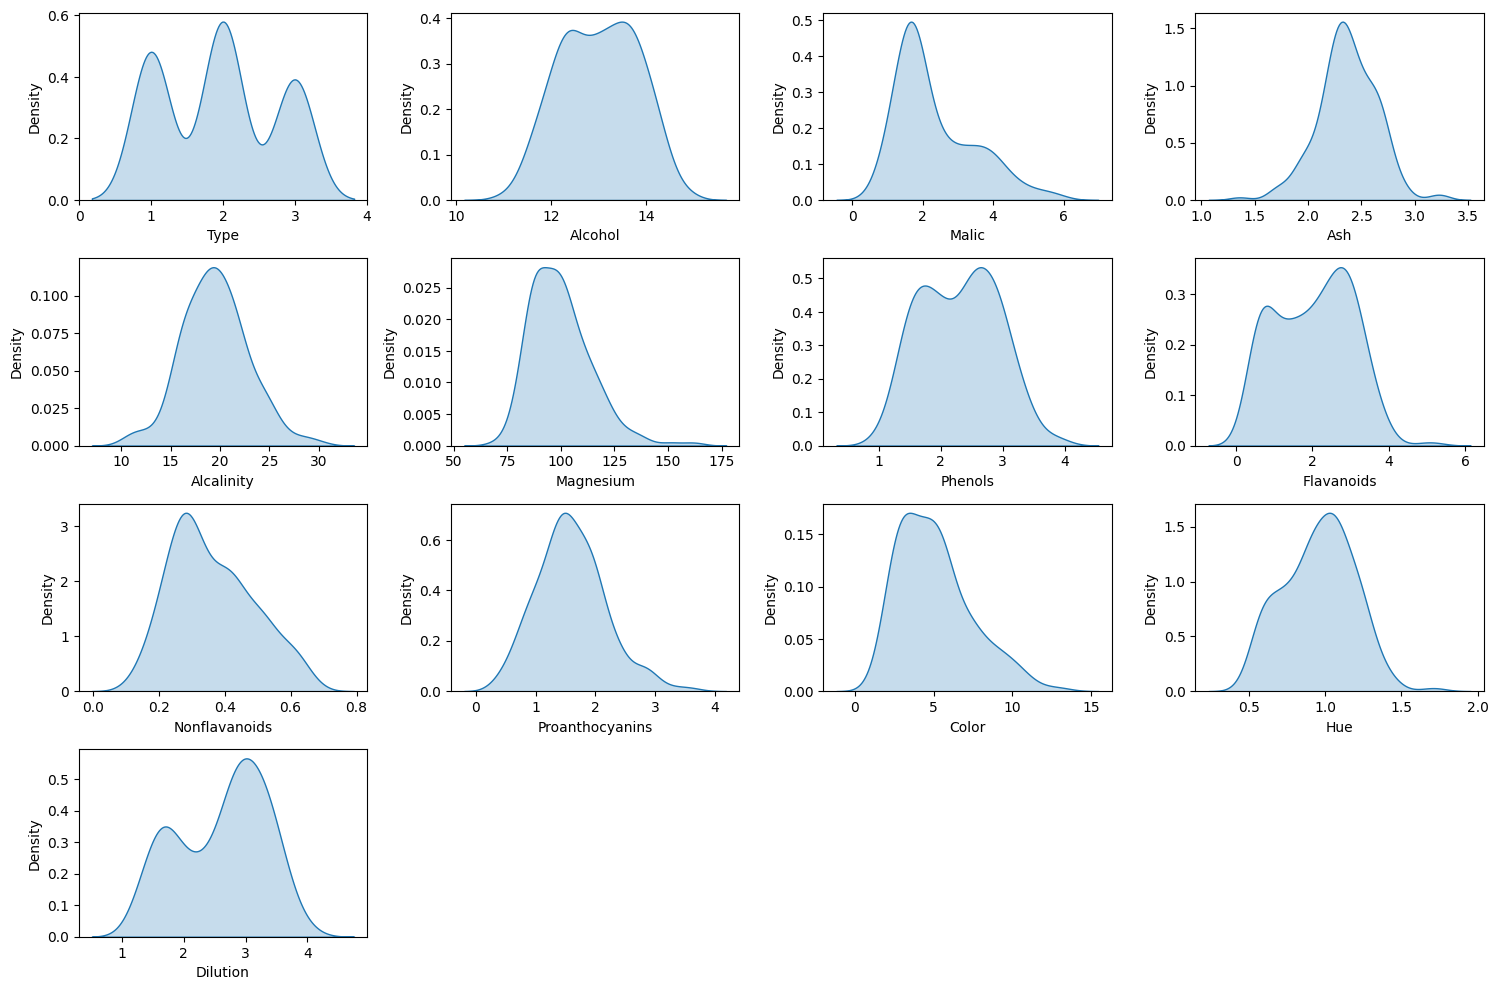

In [23]:
plt.figure(figsize=(15,10))
for i in range(len(col)-1):
    plt.subplot(4, 4, i+1)
    sns.kdeplot(x=df[col[i]], fill=True)
    plt.tight_layout()

plt.show()

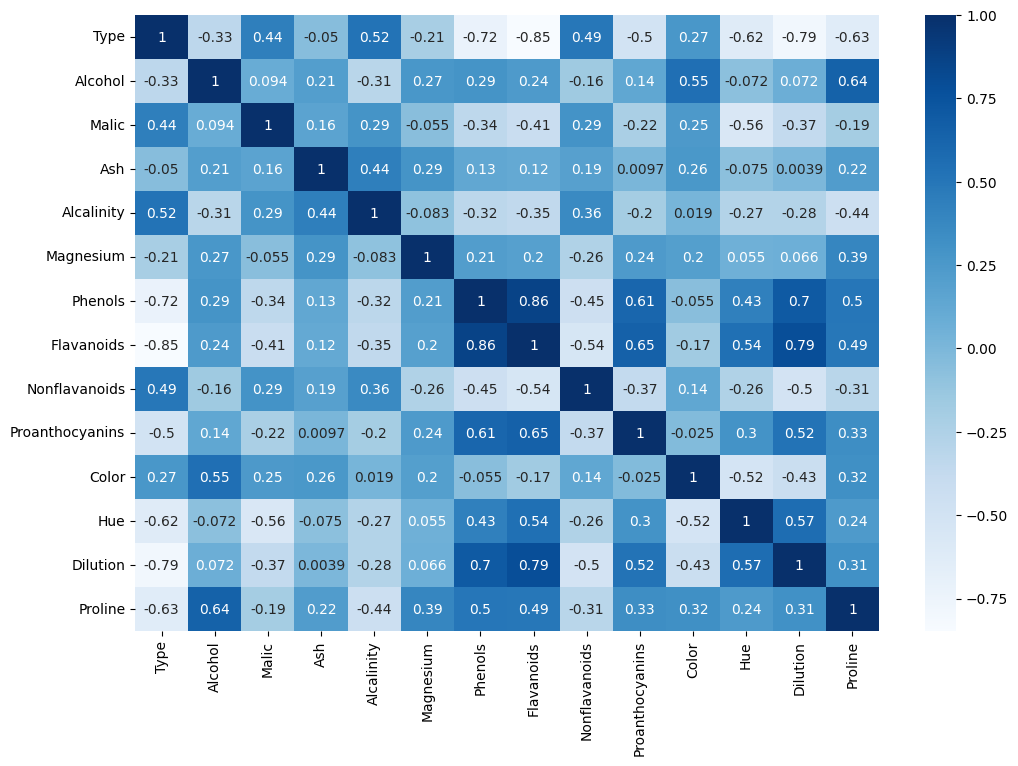

In [24]:
corr = df.corr()
plt.figure(figsize=(12,8))
sns.heatmap(corr, annot=True, cmap='Blues')
plt.show()

In [25]:
from sklearn.model_selection import train_test_split
X = df.drop('Type', axis=1)
y = df['Type']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [26]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)
X_scaled

,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
0,1.518613,-0.562250,0.232053,-1.169593,1.913905,0.808997,1.034819,-0.659563,1.224884,0.251717,0.362177,1.847920,1.013009
1,0.246290,-0.499413,-0.827996,-2.490847,0.018145,0.568648,0.733629,-0.820719,-0.544721,-0.293321,0.406051,1.113449,0.965242
2,0.196879,0.021231,1.109334,-0.268738,0.088358,0.808997,1.215533,-0.498407,2.135968,0.269020,0.318304,0.788587,1.395148
3,1.691550,-0.346811,0.487926,-0.809251,0.930918,2.491446,1.466525,-0.981875,1.032155,1.186068,-0.427544,1.184071,2.334574
4,0.295700,0.227694,1.840403,0.451946,1.281985,0.808997,0.663351,0.226796,0.401404,-0.319276,0.362177,0.449601,-0.037874
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,0.876275,2.974543,0.305159,0.301803,-0.332922,-0.985614,-1.424900,1.274310,-0.930179,1.142811,-1.392758,-1.231206,-0.021952
174,0.493343,1.412609,0.414820,1.052516,0.158572,-0.793334,-1.284344,0.549108,-0.316950,0.969783,-1.129518,-1.485445,0.009893
175,0.332758,1.744744,-0.389355,0.151661,1.422412,-1.129824,-1.344582,0.549108,-0.422075,2.224236,-1.612125,-1.485445,0.280575
176,0.209232,0.227694,0.012732,0.151661,1.422412,-1.033684,-1.354622,1.354888,-0.229346,1.834923,-1.568252,-1.400699,0.296498


In [27]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

In [28]:
X_pca

array([[ 3.31675081,  1.44346263],
       [ 2.20946492, -0.33339289],
       [ 2.51674015,  1.0311513 ],
       [ 3.75706561,  2.75637191],
       [ 1.00890849,  0.86983082],
       [ 3.05025392,  2.12240111],
       [ 2.44908967,  1.17485013],
       [ 2.05943687,  1.60896307],
       [ 2.5108743 ,  0.91807096],
       [ 2.75362819,  0.78943767],
       [ 3.47973668,  1.30233324],
       [ 1.7547529 ,  0.61197723],
       [ 2.11346234,  0.67570634],
       [ 3.45815682,  1.13062988],
       [ 4.31278391,  2.09597558],
       [ 2.3051882 ,  1.66255173],
       [ 2.17195527,  2.32730534],
       [ 1.89897118,  1.63136888],
       [ 3.54198508,  2.51834367],
       [ 2.0845222 ,  1.06113799],
       [ 3.12440254,  0.78689711],
       [ 1.08657007,  0.24174355],
       [ 2.53522408, -0.09184062],
       [ 1.64498834, -0.51627893],
       [ 1.76157587, -0.31714893],
       [ 0.9900791 ,  0.94066734],
       [ 1.77527763,  0.68617513],
       [ 1.23542396, -0.08980704],
       [ 2.18840633,

[0.36198848 0.1920749 ]
[0.36198848 0.55406338]


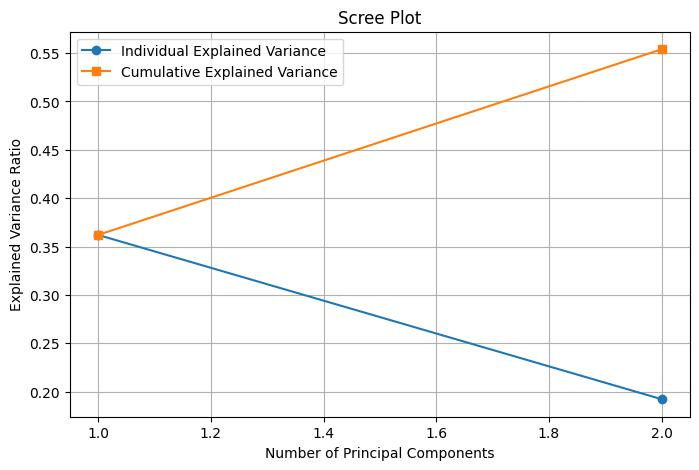

In [29]:
import numpy as np

explained_variance = pca.explained_variance_ratio_
print(explained_variance)

cumulative_variance = np.cumsum(explained_variance)
print(cumulative_variance)

plt.figure(figsize=(8,5))
plt.plot(range(1, len(explained_variance)+1), explained_variance, marker='o', label='Individual Explained Variance')
plt.plot(range(1, len(cumulative_variance)+1), cumulative_variance, marker='s', label='Cumulative Explained Variance')
plt.xlabel('Number of Principal Components')
plt.ylabel('Explained Variance Ratio')
plt.legend()
plt.title('Scree Plot')
plt.grid()
plt.show()

In [31]:
X_pca_df = pd.DataFrame(data=X_pca, columns=['PC1', 'PC2'])
X_pca_df


,PC1,PC2
0,3.316751,1.443463
1,2.209465,-0.333393
2,2.516740,1.031151
3,3.757066,2.756372
4,1.008908,0.869831
...,...,...
173,-3.370524,2.216289
174,-2.601956,1.757229
175,-2.677839,2.760899
176,-2.387017,2.297347


C:\Users\Dinesh\AppData\Roaming\Python\Python313\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


          PC1       PC2  Cluster
0    3.316751  1.443463        2
1    2.209465 -0.333393        2
2    2.516740  1.031151        2
3    3.757066  2.756372        2
4    1.008908  0.869831        2
..        ...       ...      ...
173 -3.370524  2.216289        1
174 -2.601956  1.757229        1
175 -2.677839  2.760899        1
176 -2.387017  2.297347        1
177 -3.208758  2.768920        1

[178 rows x 3 columns]


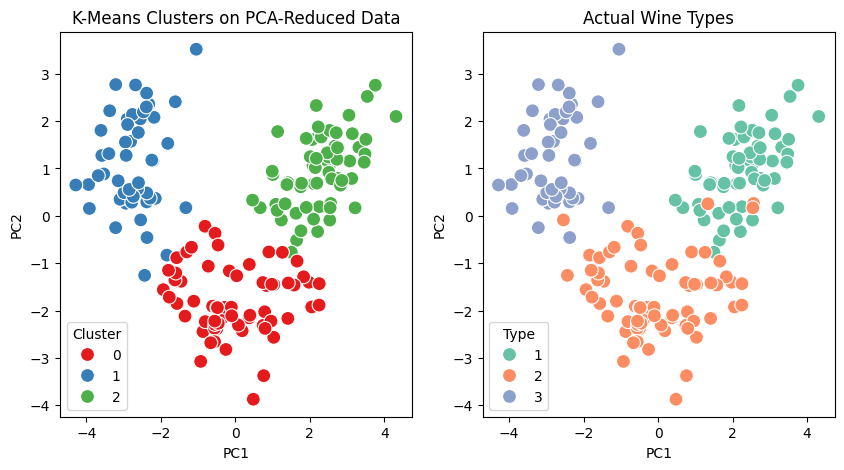

In [38]:
# 1.	Apply a clustering algorithm (e.g., K-means) to the original dataset.
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(X_scaled)
X_pca_df['Cluster'] = kmeans.labels_
print(X_pca_df)

# 2.	Visualize the clusters formed by the clustering algorithm using the PCA-reduced data.
plt.figure(figsize=(10,5))
plt.subplot(1, 2, 1)
sns.scatterplot(data=X_pca_df, x='PC1', y='PC2', hue='Cluster', palette='Set1', s=100)
plt.title('K-Means Clusters on PCA-Reduced Data')
plt.subplot(1, 2, 2)
sns.scatterplot(data=X_pca_df, x='PC1', y='PC2', hue=df['Type'], palette='Set2', s=100)
plt.title('Actual Wine Types')
plt.show()


#### The first plot shows the clusters formed by the K-Means algorithm based on the PCA-reduced data, while the second plot displays the actual wine types. By comparing these plots, we can assess how well the K-Means clustering aligns with the true wine classifications. If the clusters in the first plot correspond closely to the wine types in the second plot, it indicates that PCA effectively captured the underlying structure of the data, and K-Means was able to identify meaningful groupings. Conversely, significant discrepancies between the two plots may suggest that further refinement in feature selection or clustering parameters is needed.

In [39]:
from sklearn.metrics import silhouette_score, davies_bouldin_score
sil_score_cluster = silhouette_score(X_pca_df[['PC1', 'PC2']], X_pca_df['Cluster'])
db_score_cluster = davies_bouldin_score(X_pca_df[['PC1', 'PC2']], X_pca_df['Cluster'])
print(f'Silhouette Score: {sil_score_cluster}')
print(f'Davies-Bouldin Score: {db_score_cluster}\n')
print("="*50)
sil_score_y = silhouette_score(X_pca_df[['PC1', 'PC2']], df['Type'])
db_score_y = davies_bouldin_score(X_pca_df[['PC1', 'PC2']], df['Type'])
print(f'\nSilhouette Score: {sil_score_y}')
print(f'Davies-Bouldin Score: {db_score_y}')

Silhouette Score: 0.5583363740907524
Davies-Bouldin Score: 0.5979199979986548


Silhouette Score: 0.526154040738462
Davies-Bouldin Score: 0.639202200155112


#### Here we can see the silhouette score and davies bouldin score both are higher for actual wine types than the clusters formed by k means clustering.

In [44]:
# 1.	Compare the clustering results obtained from the original dataset and PCA-transformed data.
print("="*20,"Clustering Results Comparison","="*20)
print("Silhouette score for original data: ", silhouette_score(X_pca_df[['PC1', 'PC2']], df['Type']))
print("Silhouette score for PCA reduced data: ", silhouette_score(X_pca_df[['PC1', 'PC2']], X_pca_df['Cluster']))

==================== Clustering Results Comparison ====================
Silhouette score for original data:  0.526154040738462
Silhouette score for PCA reduced data:  0.5583363740907524


### 1. Compare the clustering results obtained from the original dataset and PCA-transformed data.
The clustering results can be compared using metrics such as Silhouette Score and Davies-Bouldin Score. Higher Silhouette Scores and lower Davies-Bouldin Scores indicate better clustering performance. By comparing these metrics for both the original dataset and the PCA-transformed data, we can assess how dimensionality reduction has affected clustering quality. Here we are getting better scores on PCA transformed data then original data.

### 2.	Discuss any similarities or differences observed in the clustering results.
The similarities are the clusters formed in both cases correspond to the actual wine types to some extent. The differences may include variations in cluster shapes and separations due to the reduced dimensionality in PCA, which can lead to different clustering boundaries compared to the original dataset.

### 3.	Reflect on the impact of dimensionality reduction on clustering performance.
Dimensionality reduction through PCA can enhance clustering performance by eliminating noise and redundant features, leading to more distinct and meaningful clusters. However, it may also result in the loss of some information, which could affect the accuracy of the clustering. The impact depends on the balance between noise reduction and information loss.


### 4.	Analyze the trade-offs between using PCA and clustering directly on the original dataset.
The analysis of trade-offs between using PCA and clustering directly on the original dataset involves considering factors such as computational efficiency, interpretability, and clustering quality. PCA can significantly reduce computational load by lowering the number of dimensions, making clustering algorithms faster and more scalable. It can also enhance interpretability by focusing on the most significant features. However, clustering on the original dataset may retain more information, potentially leading to more accurate clusters if the data is not excessively noisy or high-dimensional. The choice between the two approaches should be based on the specific characteristics of the dataset and the goals of the analysis.

# 1.	Summarize the key findings and insights from the assignment in simple terms
The key findings from this assignment indicate that applying PCA for dimensionality reduction before clustering can lead to improved clustering performance, as evidenced by better silhouette and Davies-Bouldin scores. The PCA-reduced data allowed for clearer separation of clusters, which corresponded well with the actual wine types. This suggests that PCA effectively captured the essential structure of the data while reducing noise and redundancy. Overall, using PCA in conjunction with clustering algorithms like K-Means can enhance the quality of clustering results, making it a valuable technique in data analysis. The first plot shows the clusters formed by the K-Means algorithm based on the PCA-reduced data, while the second plot displays the actual wine types. By comparing these plots, we can assess how well the K-Means clustering aligns with the true wine classifications. If the clusters in the first plot correspond closely to the wine types in the second plot, it indicates that PCA effectively captured the underlying structure of the data, and K-Means was able to identify meaningful groupings. Conversely, significant discrepancies between the two plots.

# 2.	Discuss the practical implications of using PCA and clustering in data analysis.
PCA helps in reducing dimensionality, making it easier to visualize and interpret data. Clustering on PCA-reduced data can reveal underlying patterns and groupings that may not be apparent in the original high-dimensional space. This combination is particularly useful in exploratory data analysis, customer segmentation, and anomaly detection, where understanding the structure of the data is crucial for decision-making.

# 3.	Provide recommendations for when to use each technique based on the analysis conducted.
PCA will be useful when we have high dimensional data and we want to reduce the dimensions for better visualization and analysis. Clustering will be useful when we want to group similar data points together based on their features. In cases where the data has many features, applying PCA before clustering can help in identifying the underlying structure of the data more effectively.